# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [1]:
import numpy as np
import scipy.linalg as sla

In [11]:
import numpy

data_train = numpy.loadtxt('C:/Users/artem/Downloads/train.txt', delimiter=',')
data_test = numpy.loadtxt('C:/Users/artem/Downloads/test.txt', delimiter=',')

IOError: [Errno 2] No such file or directory: 'C:/Users/artem/Downloads/train.txt'

Разделим значения $x$ и $y$

In [163]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [164]:
def RegressSolut(X, y):
    return (sla.inv(X.T.dot(X))).dot(X.T).dot(y)

In [165]:
def DataToPoly(X, degree):
    X_ = np.asmatrix(np.ones(X.shape[0])).T
    for i in range(1, degree + 1):
        X_ = np.concatenate((np.power(X, i), X_), axis=1)
    return X_

In [166]:
X = DataToPoly(np.asmatrix(X_train).T, 1)
a = RegressSolut(X, np.asmatrix(y_train).T)
a

matrix([[2.2791345 ],
        [4.43323091]])

Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

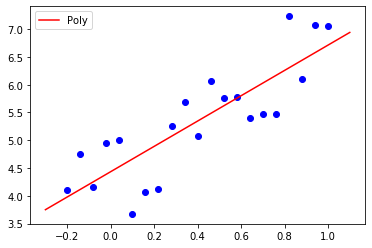

In [167]:
import matplotlib.pyplot as plt
plt.plot(X_train, y_train, 'bo')
data_x = np.array([X_train.min()-0.1, X_train.max()+0.1])
data_y = DataToPoly(np.asmatrix(data_x).T, 1).dot(a)
plt.plot(data_x, data_y, color='red', label='Poly') #добавить легенду
plt.legend()
plt.show()

Имеем 21 точку -> лучшевсего будет прилижать многочлен 20 степени, корнями которого и будут эти точки.

In [168]:
def MSE(a, X, y):
    f_x = X.dot(a)
    return np.sum(np.power((f_x - y), 2)) / X.shape[0]

In [169]:
def PlotPoly(a, X, degre, color):
    t = np.arange(X.min(), X.max() + 0.002, 0.001)
    X_print = DataToPoly(np.asmatrix(t).T, degre)
    f_X = X_print.dot(a)
    plt.plot(t, f_X, 'k', color=color, label='poly with deg '+ str(degre))         #легенду   

3.9385211270610994e-07


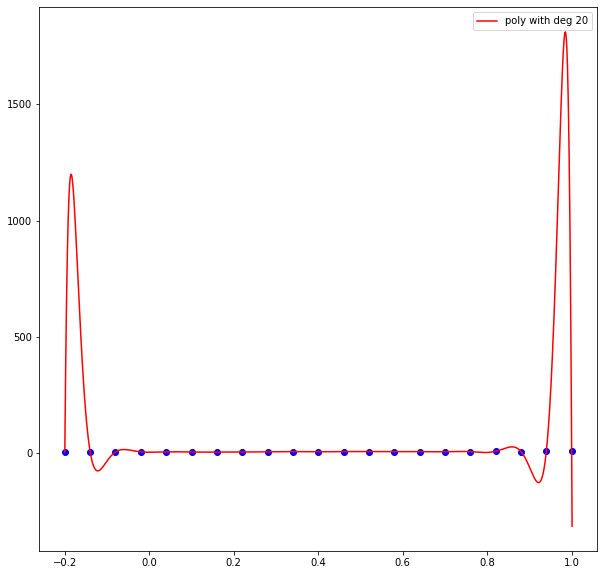

In [170]:
X = DataToPoly(np.asmatrix(X_train).T, 20)
a = np.asmatrix(sla.solve(X, y_train)).T
mse_train = MSE(a, X, np.asmatrix(y_train).T)
print(mse_train)

plt.figure(figsize=(10, 10))
plt.plot(X_train, y_train, 'bo')
PlotPoly(a, np.asmatrix(X_train).T, 20, 'red')
plt.legend()
plt.show()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

polynom power: 1
mse_train: 0.29689663326251964
mse_test: 0.4351202004048878
coefs: [[2.2791345  4.43323091]]

polynom power: 2
mse_train: 0.2696989158766912
mse_test: 0.3564762887831171
coefs: [[1.40162851 1.15783169 4.4724765 ]]

polynom power: 3
mse_train: 0.26949718714796084
mse_test: 0.3553464571518064
coefs: [[-0.3817686   1.85975084  1.06501611  4.46073636]]

polynom power: 4
mse_train: 0.26106653305792754
mse_test: 0.4417270189288398
coefs: [[  7.9184747  -13.05132812   6.79409178   1.17180239   4.34116612]]

polynom power: 5
mse_train: 0.24998504648317538
mse_test: 0.5579732021444157
coefs: [[ 29.52497804 -51.13148139  21.37479628   3.2747144   -0.13059804
    4.43129781]]

polynom power: 6
mse_train: 0.1882934898837026
mse_test: 2.5816929321010735
coefs: [[-229.97013341  581.45329821 -481.51013286  121.25709712   16.00290399
    -4.59717932    4.38379501]]

polynom power: 7
mse_train: 0.1853962115329447
mse_test: 2.5157828724622058

polynom power: 8
mse_train: 0.1590555657909

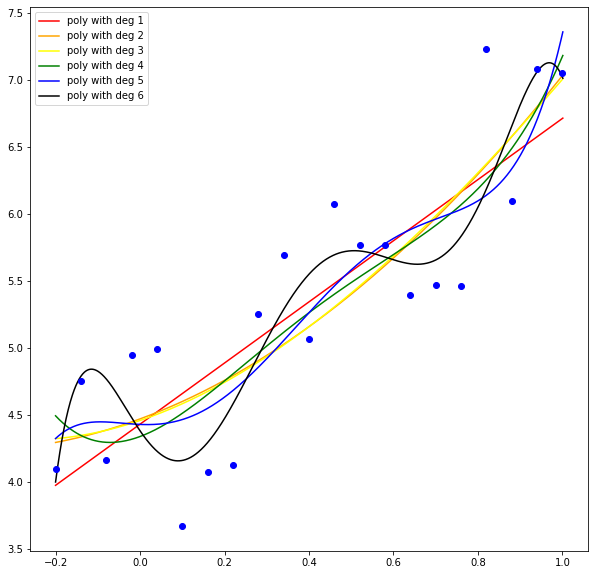

In [171]:
colors = ['red', 'orange', 'yellow', 'green','blue', '0']
plt.figure(figsize=(10, 10))
for k in range(1, 11):
    print("polynom power:", k)
    X = DataToPoly(np.asmatrix(X_train).T, k)
    a = RegressSolut(X, np.asmatrix(y_train).T)
    mse_train = MSE(a, X, np.asmatrix(y_train).T)
    
    X = DataToPoly(np.asmatrix(X_test).T, k)
    mse_test = MSE(a, X, np.asmatrix(y_test).T)
    print("mse_train:", mse_train)
    print("mse_test:", mse_test)
    
    if k <= 6:
        print("coefs:", a.T)
        PlotPoly(a, np.asmatrix(X_train).T, k, colors[k - 1])
    print()
plt.plot(X_train, y_train, 'bo')
plt.legend()
plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

С увеличением степени многочлена МSE на тестовой выборке уменьшается, всё верно, так как многочлен всё больше изгибается к "тренировочным точкам". Однако начиная с 4 степени можем увидеть, что MSE на тестовой выборке начинает увеличиваться. Это можно оббъяснить тем, что наша модель слишком уссердно тренируется, т.е. мы пытаемся прилизить нашу функцию конкретно к тренировочной выборке, при это теряя результат на всех остальных. Простыми словами - модель переобучается.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [172]:
from sklearn.model_selection import train_test_split


In [173]:
data = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
X = data[:,1:6]
y = data[:,0:1]

In [174]:
X_ = X.copy()
y_ = y.copy()

X_ = np.concatenate((X_, np.asmatrix(np.ones(X_.shape[0])).T), axis=1)
a = (sla.inv(X_.T.dot(X_))).dot(X_.T).dot(y_)
f_x = X_.dot(a)
mse = np.sum(np.power((f_x - y_), 2)) / f_x.shape[0]
mse

[[  1.48705289]
 [  1.656289  ]
 [  1.81920498]
 [ -3.32715406]
 [ -1.3156886 ]
 [-26.78926963]]


924.0090032083978

Чем больше значние регрессионный коэффицент, тем большую роль в стоимости квартиры будет играть соответсвуюющий параметр. Если же коэффицент имеет отрицательный знак, то можем считать, что рост этого параметра отрицательно сказывается на стоимости квартиры. Действительно, такие параметры, как площадь квартиры нам крайне важны, и чем больше площадь, тем дороже цена. А вот расстояние до центра и метро уже имеют отрицательные коэффиценты, потому что чем больше это расстояние, тем хуже нам, а значит при росте этих параметров стоимость должна понижаться, что вполне логично.

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

**ВНИМАНИЕ ВНИМАНИЕ ВНИМАНИЕ ВНИМАНИЕ ВНИМАНИЕ !!!!!!!!!!!!!!! ВНИМАНИЕ ВНИМАНИЕ ВНИМАНИЕ ВНИМАНИЕ ВНИМАНИЕ**
**СЛЕДУЩИЙ КОД ЭТОГО НОМЕРА РАБОТАЕТ ДОЛГО, ЗАПУСКАТЬ НА СВОЙ  СТРАХ И РИСК!!!**

спасибо за  внимание

In [80]:
def MSE(X, y, rand_count):
    train_mse_summ  =  0
    test_mse_smmm = 0
    not_singular = 0
    for i in range(rand_count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
        X_train = np.concatenate((X_train, np.asmatrix(np.ones(X_train.shape[0])).T), axis=1)
        X_test = np.concatenate((X_test, np.asmatrix(np.ones(X_test.shape[0])).T), axis=1)
        try:
            a = (sla.inv(X_train.T.dot(X_train))).dot(X_train.T).dot(y_train)
        except Exception:
            c = 1
        else:
            f_x = X_train.dot(a)
            train_mse= np.sum(np.power((f_x - y_train), 2)) / f_x.shape[0]
            f_x = X_test.dot(a)
            test_mse= np.sum(np.power((f_x - y_test), 2)) / f_x.shape[0]
            train_mse_summ += train_mse
            test_mse_smmm += test_mse
            not_singular += 1
    if (not_singular == 0):
        return([0, 0])
    test_mse_smmm /= not_singular
    train_mse_summ /= not_singular
    return(train_mse_summ, test_mse_smmm)

In [128]:
X_bester.shape

(2040, 7)

In [129]:
#Step 1
# Для начала построим новую матрицу Х, где на месте i столца будет  тот же i столбеец, но в какой то степени
# Я руками перебрал несколько вариантов степенй кадый раз ссмещаясь к наименьшему MSE и пришёл вот к таким параметрам:
# Mse было где то 780
X_new = np.power(X[:,0:1], 0.8)
X_new = np.concatenate((X_new, np.power(X[:,1:2], 7)), axis=1)
X_new = np.concatenate((X_new, np.power(X[:,2:3], 0.9)), axis=1)
X_new = np.concatenate((X_new, np.power(X[:,3:4], 1/2)), axis=1)
X_new = np.concatenate((X_new, np.power(X[:,4:5], 1/10)), axis=1)
min_mse = 750
#Step----
#new_param и new_new_param это 2 наилучших реезультата, которые я нашёл, на первом мсе ~750, на втором ~745
degrees = [0, 2, 1, 1/2]
new_param = np.power(X[:,0:1], 1) * np.power(X[:,3:4], 1)
new_new_param = np.power(X[:,0:1], degrees[2]) * np.power(X[:,2:3], degrees[3]) * np.power(X[:,3:4], degrees[2])
#Step 2
# Теперь к уже готовой X_new будем добавлять перемножение всех столбцов, каждый из которых в какой то степени.
# И таким  образом расссмотрим все возможные комбинации степеней из degrees
#  X_bester будет хранить лучшую выборку
X_new = np.concatenate((X_new, np.power(new_new_param, 1/2)), axis=1)
X_best = X_new.copy()
min_mse = MSE(X_new, y, 4000)[1]
print(min_mse)
mse_arr = []
X_bester = np.array([])
#for i in range(4):
#    for j in range(i+1, 4):
deeper_mse =  740
for deg1 in range(4):
    if degrees[deg1] == 0:
        new_param = np.ones(X.shape[0]).reshape(X.shape[0],1)
        print(new_param.shape)
    else:
        new_param = np.power(X[:,0:1], degrees[deg1])
    for deg2 in range(4):
        new_param2 = new_param.copy()
        if degrees[deg2] != 0:
            new_param2  *= np.power(X[:,1:2], degrees[deg2])
        for deg3 in range(4):
            new_param3 = new_param2.copy()
            if degrees[deg3] != 0:
                new_param3 *= np.power(X[:,2:3], degrees[deg3])
            for deg4 in range(4):
                new_param4 = new_param3.copy()
                if degrees[deg4] != 0:
                    new_param4 *= np.power(X[:,3:4], degrees[deg4])
                for deg5 in range(4):
                    new_param5 = new_param4.copy()
                    if degrees[deg5] != 0:
                        new_param5 *= np.power(X[:,4:5], degrees[deg5])
                    X_new = X_best.copy()
                    X_new = np.concatenate((X_new, np.power(new_param5, 1/2)), axis=1)
                    mse = MSE(X_new, y, 500)
                    if mse[1] < deeper_mse:
                        X_bester = X_new
                        deeper_mse  = mse[1]
                        mse_arr.append([mse, [deg1, deg2, deg3, deg4, deg5]])
                        print(mse[1], "---------------------")
                        if (mse[1] < min_mse):
                            min_mse = mse[1]
            
            
            
            
            
            
            

print(min_mse)

746.5657822609828
(2040, 1)
738.144618942154 ---------------------
737.8373104832626 ---------------------
737.6229352501672 ---------------------
735.3774283858039 ---------------------
735.3774283858039


In [132]:
MSE(X_bester, y, 4000)

(720.9102815919241, 746.9618265833155)

Результат неплох, надеюсь, что этого хватит, но далее попробуем немного другой метод. Если подумать, что призниаки общая площадб кв, площадь кухни и жилая площадь в целом зависят друг от друга; а также частично расст. до метро и расст. до центре. Попробуем объединить эти группы , где в каждоый группе соответсвующие столбцы будут идти в своих степенях.

In [133]:
min_mse = 10000
X_best = np.array([[]])
best_result = [1, 1, 1, 1, 1]
for deg1 in range(-5, 5):
    for deg2 in range(-5,  5):
        for deg3 in range(-5, 5):
            X_new = np.power(X[:,0:1], deg1) * np.power(X[:,1:2], deg2) * np.power(X[:,2:3], deg3)
            for  deg4 in range(-5, 5):
                for deg5 in range(-5,5):
                    X_new2 = np.concatenate((X_new, (np.power(X[:,3:4], deg4) * np.power(X[:,4:5], deg5))), axis=1)
                    mse = MSE(X_new2, y, 10)
                    if (mse[1] < min_mse  and mse[1] != 0):
                        X_best = X_new2
                        best_result = [deg1, deg2, deg3, deg4, deg5]
                        print(mse[1])
                        min_mse = mse[1]
print(min_mse)

2635.7899620081175
2591.82239407232
2390.5136433159305
2384.949153342529
2292.2052531274635
2281.760889704983
2222.8141265129925
2203.935951962634
2177.4360709252337
2127.3340619246965
2067.8191439784455
2041.8311540163977
2016.1262838063262
1999.7866088806418
1890.2444488512374
1859.3687649527815
1822.9440282598994
1814.6856444137143
1776.6885963433524
1765.4695950055284
1740.7821393138142
1688.9861318680917
1667.59865670014
1594.874274277221
1555.0768308177276
1505.1666155973685
1358.6765389749585
1356.7694362695634
1348.872519265054
1286.019932427948
1264.6706783480472
1239.3178122382199
1213.5878317723996
1184.6839698901485
1168.3608564818896
1151.993253569037
1144.249010631213
1133.648995605565
1081.0935993926391
1058.4438255036346
1043.69989159254
1030.4660247490501
1028.6257868041594
1014.583629455325
1005.0769476857686
1000.4873135680316
982.1225715517191
967.2174989251387
926.0152983376645
884.8957822050082
879.7814018293296
860.1056320481757
860.1056320481757


In [135]:
MSE(X_best, y, 1000)

(920.881824351082, 925.306289316819)

Нда, результат не утешает, но нужно помнить, что это лишь 2 столбца. Попробуем добавить какие нибудь столбцы из X в степенях.

In [136]:
min_mse = 900
X_best2 = X_best.copy()
count = 0
while(True):
    try_conc = False
    conc = np.array([])
    for i in range(4):
        for deg in range(-10, 10, 1):
            X_best3 = np.concatenate((X_best2, np.power(X[:,i:i+1], deg)), axis=1)
            curr_mse = MSE(X_best3, y, 100)
            if (curr_mse[1] < min_mse and curr_mse[1] != 0):
                print(curr_mse[1])
                min_mse = curr_mse[1]
                try_conc = True
                conc  = np.power(X[:,i:i+1], deg)
    if (not try_conc) or count == 20:
        break
    X_best2 = np.concatenate((X_best2, conc), axis=1)
    count += 1

895.8539556185137
892.6156982209337
891.920090958736
884.2968868414885
877.8908675731046
872.4369264265373
865.1802502331844
864.677013419032
848.2100965495614
845.4189133308557
841.2507038298907
830.3085803415471
822.7923193513084
818.3025157200246
810.6571690436668
808.4408644217714
808.2153085064409
802.8137646890701
798.3377148806961
797.5471628184797
795.2450523264354
790.6682301961129
773.4007703193704
770.4777610040896
767.4750139208534
767.2549990273905
765.5255993305193
763.7559725715878
762.6627165548338


In [139]:
MSE(X_best2, y, 1000)

(738.9071799015361, 781.6178968838896)

Немного лучше, но всё равно не достаточно. Попробуем изменять нашу матрицу почти таким же образом, но на этот раз пока с каждым шагом MSE уменьшается будем  добавлять какой то столбец этой же матрицы в какой то степени.

In [140]:
min_mse = 800
X_best3 = X_best2.copy()
count = 0
while(True):
    try_conc = False
    conc = np.array([])
    for i in range(X_best3.shape[1]):
        for deg in range(-10, 10, 1):
            X_best4 = np.concatenate((X_best3, np.power(X_best3[:,i:i+1], deg)), axis=1)
            curr_mse = MSE(X_best4, y, 100)
            if (curr_mse[1] < min_mse and curr_mse[1] != 0):
                print(curr_mse[1])
                min_mse = curr_mse[1]
                try_conc = True
                conc  = np.power(X_best3[:,i:i+1], deg)
    if (not try_conc) or count == 100:
        break
    X_best3 = np.concatenate((X_best3, conc), axis=1)
    count += 1

783.9422406170238
782.980130069754
780.7772251973131
778.4440150972653
772.4282029751499
764.3864761482162
761.2763749900193
759.2907635393273
749.5546275120236
745.0204533910023
739.4137411932503
734.6637659647739
723.1880158270146
720.4585414613111


In [141]:
MSE(X_best3, y, 1000)

(702.933960420136, 746.1728644629005)

Такой же  результат, как и в первом  случае. это немного печалит, но в целом результат не так плох. Мой  азарт угас...

### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [175]:
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]

In [176]:
X = np.asmatrix(np.ones(21)).T
for i in range(1, 7):
    X_ = np.power(np.asmatrix(X_train).T, i)
    X = np.column_stack((X, X_))
X_mat_test = np.asmatrix(np.ones(21)).T

for i in range(1, 7):
    X_ = np.power(np.asmatrix(X_test).T, i)
    X_mat_test = np.column_stack((X_mat_test, X_))

best_lam = 0
min_mse = 100000
lambda_mas = np.arange(0, 2, 0.001) #изначально проходился циклом по гораздо большему диапазону, но чтобы сделать
for lam in lambda_mas:                 #lambda более точной постепенно сузил диапазон
    regul = lam * np.eye(X.shape[1])
    a = (sla.inv(X.T.dot(X)+ regul)).dot(X.T).dot(np.asmatrix(y_train).T)
    f_x = X_mat_test.dot(a)
    mse = np.sum(np.power((f_x - np.asmatrix(y_test).T).reshape(-1,1), 2)) / 21
    if mse < min_mse:
        min_mse =  mse
        best_lam = lam
print(min_mse, best_lam)

(21, 7)
0.30734409331865403 1.158


In [177]:
regul = best_lam * np.eye(X.shape[1])
detX = np.linalg.det(X.T.dot(X)) #train
det_lam = np.linalg.det(X.T.dot(X)+ regul)
print(detX, det_lam)

9.082864838378161e-12 1012.5548470328209


Можем видеть, что регуляризация помогает избежать вырожденности  матрицы X^TX, что очень полезно.

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

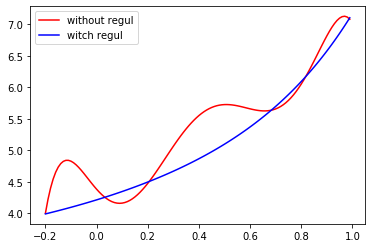

In [178]:
regul = best_lam * np.eye(X.shape[1])
simple_poly = (sla.inv(X.T.dot(X))).dot(X.T).dot(np.asmatrix(y_train).T)
regul_poly  = (sla.inv(X.T.dot(X)+ regul)).dot(X.T).dot(np.asmatrix(y_train).T)
t = np.arange(X_train.min(), X_train.max(), 0.01)
    
X = np.asmatrix(np.ones(t.shape[0])).T
for i in range(1, 7):
    X_ = np.power(np.asmatrix(t).T, i)
    X = np.column_stack((X, X_))
simple_f_x = np.dot(X, simple_poly)
regul_f_x = np.dot(X, regul_poly)
plt.plot(t, simple_f_x, 'k', color='red', label='without regul')
plt.plot(t, regul_f_x, 'k', color='blue', label='witch regul')
plt.legend()

Поскольку у многочлена  с регуляризацией получаются небольшие коэффиценты, то, как и предполагается, его график выглядит более планым, без различных изгибов (которые как раз получаются из за больших коэффицентов)

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**
У нас задана функция MSE = $$|Xa - y|^2 + \lambda|a|^2$$ Нам  требуется найти её минимум, тогда найдём производнуюю этой функции, приравняем к 0 и найдём решеение. $$|Xa - y|^2 + \lambda|a|^2 = (Xa - y)^T(Xa - y) + \lambda a^Ta = (a^TX^T - y^T)(Xa - y) + \lambda a^Ta = a^TX^TXa - a^TX^Ty - (X^Ty)^Ta + y^Ty + \lambda a^Ta = a^TX^TXa - 2a^TX^Ty + y^Ty + \lambda a^Ta =$$(возьмём производную по a)$$ = 2X^TXa(X^TX - симметрична) - 2X^Ty + 2\lambda a$$ Теперь  приравниваем к 0: $$X^TXa - X^Ty + \lambda a = 0 <=> (X^TX + \lambda E)a = X^Ty <=> a = (X^TX + \lambda E)^{-1}X^Ty$$

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

Пусть у нас есть n признаков, т.е. X.shape = (t, n). Тогда когда мы добавляем новый объект у X_(t+1) прибавляется снизу ещё одна строка длины n. Обозначим её а. Тогда к X^t справа прибавлятся соответсвенно столбец a^t. Просто перемножим их,  и получится, что при перемножении i строки на j столбец получится в точности [i][j] элемент матрицы X^tX + (a_i * a_j), т.е. получившаяся матриа будет иметь вид X^tX + a^ta. То есть нам достаточно посчитать a^ta, а это имееот сложность О(n^2), что не зависит от t.

Опять же у нас n признаков. К X^t справа ддобавляется столбпец длины n. Обозначим его a^t. Тогда к столбцу y добавляется ээлемент, обозначим его q. Просто перемножая  заметим, что при перемножении i строки X^t (новой) на y у нас полуится в точности элементк как при перемножении i строки из X^t (без столбца a^t) на y + a[i]*q. То есть получившаяся матрица будет иметь вид X^ty + a^tq, нам нужно посчитать только a^tq, а это можно сделать за О(n), что не зависит от t.

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

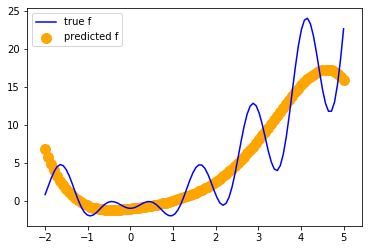

In [179]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1

x_grid = np.linspace(-2,5,100)
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

X_transX = np.zeros((6, 6))
X_transy = np.zeros((6, 1))
X_to_print = np.asmatrix(np.array([1] * x_grid.shape[0])).T
print(x_grid.shape)
for i  in range(1, 6):
    X_to_print = np.concatenate((X_to_print, np.power(np.asmatrix(x_grid).T, i)), axis=1)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    x_add = np.array([1])
    for j  in range(1, 6):
        x_add = np.append(x_add, x_new**j)
    x_add = np.asmatrix(x_add)

    X_transX += x_add.T.dot(x_add)
    X_transy += (y_new * x_add.T)
    coefs = sla.inv(X_transX).dot(X_transy)
    
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        y_pred = X_to_print.dot(coefs)
        
        plt.scatter(x_grid, y_pred.tolist(), color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

**К Р А С И В О**

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.